In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 5.1

In [2]:
maruti = pd.read_csv("MARUTI.csv")
maruti['Daily Return'] = maruti['Close Price'].pct_change().fillna(0)
print("Maruti Daily Mean return: ", maruti['Daily Return'].mean())
print("Maruti Daily Standard deviation return: ", maruti['Daily Return'].std())
print("Annual Mean: ", maruti['Daily Return'].mean()*252)
print("Annual Standard deviation: ", maruti['Daily Return'].std()*math.sqrt(252))

Maruti Daily Mean return:  1.552752141358161e-05
Maruti Daily Standard deviation return:  0.014159500631432956
Annual Mean:  0.003912935396222566
Annual Standard deviation:  0.22477510415780186


### 5.2

In [4]:
tcs = pd.read_csv("TCS.csv")
pvr = pd.read_csv("PVR.csv")
jublfood = pd.read_csv("JUBLFOOD.csv")
godrej = pd.read_csv("GODREJIND.csv")
daily_return = pd.concat([maruti['Close Price'], tcs['Close Price'], pvr['Close Price'], godrej['Close Price'], jublfood['Close Price']], join='inner', axis=1)
daily_return.columns = ['Maruti', 'TCS', 'PVR', 'Godrej', 'Jublfood']
daily_return = daily_return.pct_change()
daily_return.dropna(inplace=True)
mean_return = daily_return.mean()
cov_return = daily_return.cov()

In [5]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
portfolio_mean_return = np.sum(mean_return * weights)*252
portfolio_std_return = np.sqrt(np.dot(weights.T, np.dot(cov_return, weights))) * math.sqrt(252)
print("Portfolio annualised return is {:.3f} and volatility is {:.3f}".format(portfolio_mean_return, portfolio_std_return))

Portfolio annualised return is 0.075 and volatility is 0.179


### 5.3

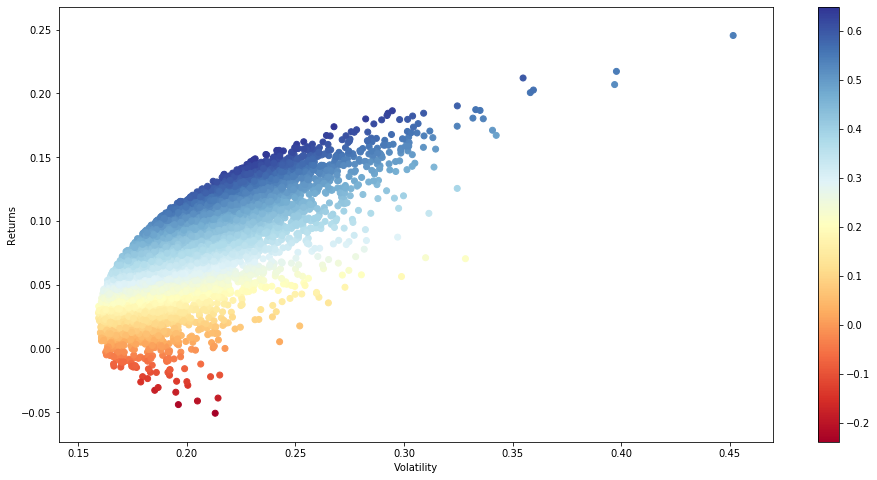

In [6]:
test_case = 10000
portfolio = np.zeros((3, test_case))
for i in range(test_case):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_mean_return = np.sum(mean_return * weights)*252
    portfolio_std_return = np.sqrt(np.dot(weights.T, np.dot(cov_return, weights))) * math.sqrt(252)
    portfolio[0, i] = portfolio_mean_return
    portfolio[1, i] = portfolio_std_return
    portfolio[2, i] = portfolio[0, i] / portfolio[1, i]

portfolio_frame = pd.DataFrame(portfolio.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])
plt.figure(figsize=(16, 8))
plt.scatter(portfolio_frame['Volatility'], portfolio_frame['Return'], c=portfolio_frame['Sharpe Ratio'], cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

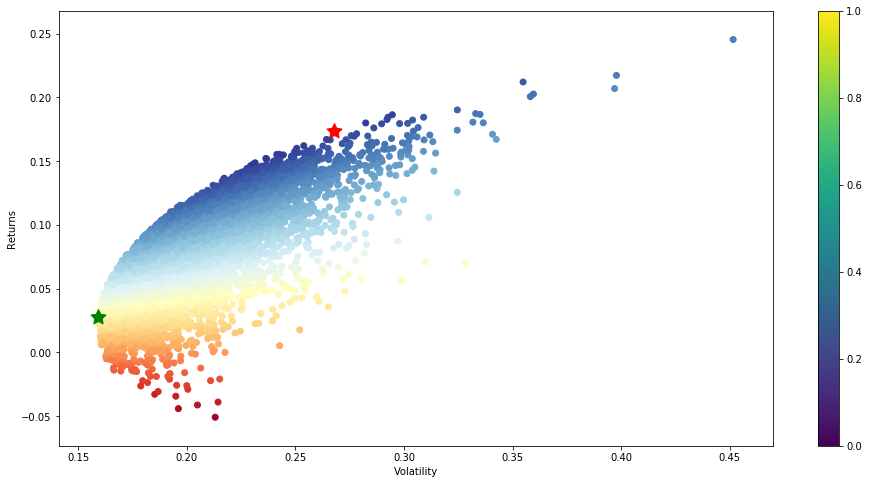

In [7]:
max_sharpe = portfolio_frame.iloc[portfolio_frame['Sharpe Ratio'].idxmax()]
min_volatility = portfolio_frame.iloc[portfolio_frame['Volatility'].idxmin()]
plt.figure(figsize=(16, 8))
plt.scatter(portfolio_frame['Volatility'], portfolio_frame['Return'], c=portfolio_frame['Sharpe Ratio'], cmap='RdYlBu')
plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5,1,0), color='r', s=250)
plt.scatter(min_volatility[1], min_volatility[0], marker=(5,1,0), color='g', s=250)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()